# importing libraries

In [1]:
# Importing some important librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Describe the numerical data

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

# missing value

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

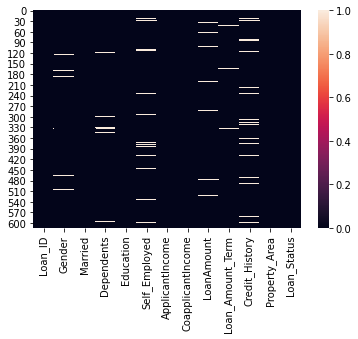

In [7]:
sns.heatmap(df.isnull())

In [8]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [9]:
df['Gender'].fillna(value='Male',inplace=True)
df['Married'].fillna(value='Yes',inplace=True)
df['Dependents'].fillna(value='0',inplace=True)
df['Self_Employed'].fillna(value='NO',inplace=True)
df['LoanAmount'].fillna(value=df.LoanAmount.mean(),inplace=True)
df['Loan_Amount_Term'].fillna(value=360,inplace=True)
df['Credit_History'].fillna(value=1.0,inplace=True)

# categorical value handeling

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [11]:
# Gender
df['Gender'].replace('Male',1,inplace=True)
df['Gender'].replace('Female',0,inplace=True)
# Married
df['Married'].replace('Yes',1,inplace=True)
df['Married'].replace('No',0,inplace=True)
# Education
df['Education'].replace('Graduate',1,inplace=True)
df['Education'].replace('Not Graduate',0,inplace=True)
# Self_Employed
df['Self_Employed'].replace('Yes',1,inplace=True)
df['Self_Employed'].replace('NO',0,inplace=True)
df['Self_Employed'].replace('No',0,inplace=True)
# Property_Area
Area_Data=pd.get_dummies(df['Property_Area'])
df.drop('Property_Area',axis=1,inplace=True)
df[['Urban', 'Rural', 'Semiurban']]=Area_Data
# Loan_Status
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)


# Dependents
Dependents_data=pd.get_dummies(df['Dependents'])
df.drop('Dependents',axis=1,inplace=True)
df[['0', '1', '2', '3+']]=Dependents_data

In [12]:
# Loan_ID is not required
df.drop('Loan_ID',axis=1,inplace=True)

In [13]:
# data spliting
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)
print('Shape of X_train is: ',x_train.shape)
print('Shape of Y_train is: ',y_train.shape)
print('Shape of X_test is: ',x_test.shape)
print('Shape of y_test is: ',y_test.shape)

Shape of X_train is:  (491, 16)
Shape of Y_train is:  (491,)
Shape of X_test is:  (123, 16)
Shape of y_test is:  (123,)


# LOGISTIC REGRESSION

In [15]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [16]:
log.fit(x_train,y_train)

LogisticRegression()

In [17]:
log.score(x_train,y_train)

0.8065173116089613

In [18]:
#Predicting trest dataset
pred=log.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8292682926829268

In [20]:
from sklearn import metrics

In [21]:
metrics.confusion_matrix(y_test,pred)

array([[14, 19],
       [ 2, 88]], dtype=int64)

# model saving

In [22]:
import sklearn
import joblib

In [23]:
joblib.dump(log,'LOGISTIC_REGRESSION.pkl')

['LOGISTIC_REGRESSION.pkl']

# DECISION TREE

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [25]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
clf.score(x_train,y_train)

1.0

In [27]:
pred1=clf.predict(x_test)

In [28]:
accuracy_score(y_test,pred1)

0.7479674796747967

In [29]:
metrics.confusion_matrix(y_test,pred1)

array([[19, 14],
       [17, 73]], dtype=int64)

In [30]:
metrics.f1_score(y_test,pred1)

0.8248587570621468

In [31]:
metrics.recall_score(y_test,pred1)

0.8111111111111111

In [32]:
metrics.precision_score(y_test,pred1)

0.8390804597701149

# model saving

In [33]:
joblib.dump(clf,'DECISION_TREE.pkl')

['DECISION_TREE.pkl']

In [36]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Urban,Rural,Semiurban,0,1,2,3+
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,0,1,1,0,0,0
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,0,1,0,0
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,1,0,0,1,1,0,0,0
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1,1,0,0,0
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,0,1,1,0,0,0


In [35]:
df.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Urban', 'Rural', 'Semiurban', '0', '1', '2', '3+'],
      dtype='object')

# model testing

## logistic

In [34]:
modelReload=joblib.load('LOGISTIC_REGRESSION.pkl')

In [37]:
temp={}
temp['Gender']=1
temp['Married']=0
temp['Education']=1
temp['Self_Employed']=0
temp['ApplicantIncome']=5849
temp['CoapplicantIncome']=0.0
temp['LoanAmount']=146.412162
temp['Loan_Amount_Term']=360.0
temp['Credit_History']=1.0
temp['Urban']=0
temp['Rural']=0
temp['Semiurban']=1
temp['0']=1
temp['1']=0
temp['2']=0
temp['3+']=0

In [38]:
testDtaa=pd.DataFrame({'x':temp}).transpose()

In [39]:
testDtaa

,0,1,2,3+,ApplicantIncome,CoapplicantIncome,Credit_History,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Rural,Self_Employed,Semiurban,Urban
x,1.0,0.0,0.0,0.0,5849.0,0.0,1.0,1.0,1.0,146.412162,360.0,0.0,0.0,0.0,1.0,0.0


In [40]:
modelReload.predict(testDtaa)[0]

1

# DECISION

In [44]:
modelReload1=joblib.load('DECISION_TREE.pkl')

In [45]:
testDtaa=pd.DataFrame({'x':temp}).transpose()

In [46]:
modelReload1.predict(testDtaa)[0]

1

In [47]:
df.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Urban', 'Rural', 'Semiurban', '0', '1', '2', '3+'],
      dtype='object')